In [15]:
import pandas as pd
import pandas as pd                     # to extract data from dataset(.csv file)
import csv                              #used to read and write to csv files
import numpy as np  


csvFile = pd.read_csv('train.csv')  
def monthly_sales(data):    
    data = data.copy()     
    # Drop the day indicator from the date column    
    data.date = data.date.apply(lambda x: str(x)[:-3])     
    # Sum sales per month    
    data = data.groupby('date')['sales'].sum().reset_index()    
    data.date = pd.to_datetime(data.date)  
    data.to_csv('file1.csv')     
    return data
data = csvFile
monthly_data = monthly_sales(data)
print(data)
print(monthly_data)



              date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]
         date    sales
0  2013-01-01   454904
1  2013-02-01   459417
2  2013-03-01   617382
3  2013-04-01   682274
4  2013-05-01   763242
5  2013-06-01   795597
6  2013-07-01   855922
7  2013-08-01   766761
8  2013-09-01   689907
9  2013-10-01   656587
10 2013-11-01   692643
11 2013-12-01   506607
12 2014-01-01   525987
13 2014-02-01   529117
14 2014-03-01   704301
15 2014-04-01   788914
16 2014-05-01   882877
17 2014-06-01   906842
18 2014-07-01   989010
19 2014-08-01   885596
20 2014-09-01   785124

In [16]:
# Calculate difference in sales month over month
def get_diff(data):
    data['sales_diff'] = data.sales.diff()    
    data = data.dropna()      
    return data
stationary_df = get_diff(monthly_data)
print(stationary_df)

         date    sales  sales_diff
1  2013-02-01   459417      4513.0
2  2013-03-01   617382    157965.0
3  2013-04-01   682274     64892.0
4  2013-05-01   763242     80968.0
5  2013-06-01   795597     32355.0
6  2013-07-01   855922     60325.0
7  2013-08-01   766761    -89161.0
8  2013-09-01   689907    -76854.0
9  2013-10-01   656587    -33320.0
10 2013-11-01   692643     36056.0
11 2013-12-01   506607   -186036.0
12 2014-01-01   525987     19380.0
13 2014-02-01   529117      3130.0
14 2014-03-01   704301    175184.0
15 2014-04-01   788914     84613.0
16 2014-05-01   882877     93963.0
17 2014-06-01   906842     23965.0
18 2014-07-01   989010     82168.0
19 2014-08-01   885596   -103414.0
20 2014-09-01   785124   -100472.0
21 2014-10-01   758883    -26241.0
22 2014-11-01   800783     41900.0
23 2014-12-01   578048   -222735.0
24 2015-01-01   552513    -25535.0
25 2015-02-01   551317     -1196.0
26 2015-03-01   730951    179634.0
27 2015-04-01   824467     93516.0
28 2015-05-01   9269

In [17]:
def generate_arima_data(data):
    dt_data = data.set_index('date').drop('sales', axis=1)        
    dt_data.dropna(axis=0)     
    dt_data.to_csv('file2.csv')
    return dt_data
arima_data = generate_arima_data(stationary_df)
arima_data

,sales_diff
date,
2013-02-01,4513.0
2013-03-01,157965.0
2013-04-01,64892.0
2013-05-01,80968.0
2013-06-01,32355.0
2013-07-01,60325.0
2013-08-01,-89161.0
2013-09-01,-76854.0
2013-10-01,-33320.0


In [18]:
def generate_supervised(data):
    supervised_df = data.copy()
    
    #create column for each lag
    for i in range(1,13):
        col = 'lag_' + str(i)
        supervised_df[col] = supervised_df['sales_diff'].shift(i)
    
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    supervised_df.to_csv('file3.csv', index=False)
    
    return supervised_df
model_df = generate_supervised(stationary_df)
model_df

,date,sales,sales_diff,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
0,2014-02-01,529117,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,2014-03-01,704301,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,2014-04-01,788914,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,2014-05-01,882877,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,2014-06-01,906842,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,2014-07-01,989010,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,2014-08-01,885596,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,2014-09-01,785124,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,2014-10-01,758883,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,2014-11-01,800783,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


RMSE: 16221.040790693221
MAE: 12433.0
R2 Score: 0.9907155879704752
RMSE: 19100.106116633662
MAE: 16065.666666666666
R2 Score: 0.98712733305085
RMSE: 15701.003359658262
MAE: 13342.666666666666
R2 Score: 0.9913013514225064


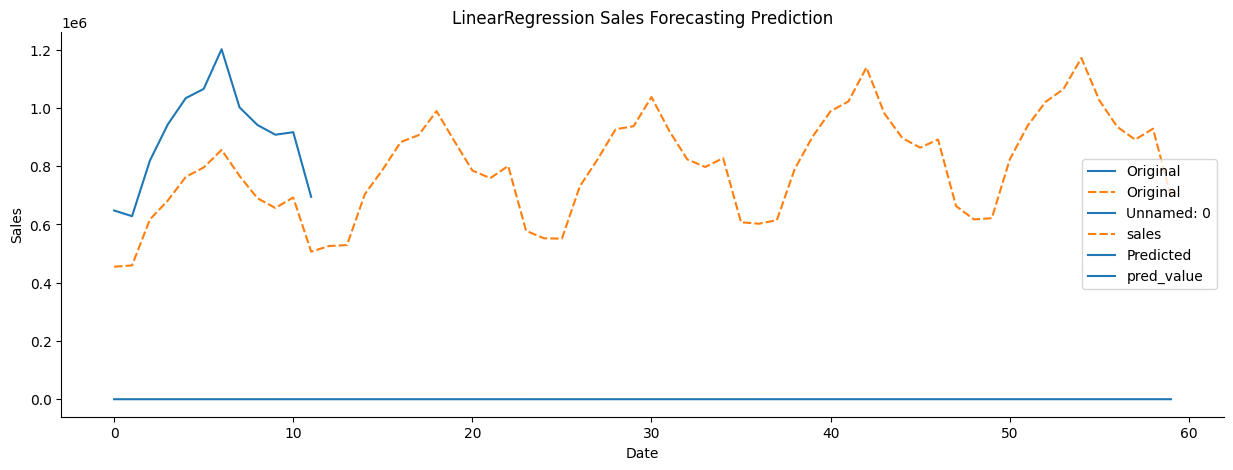

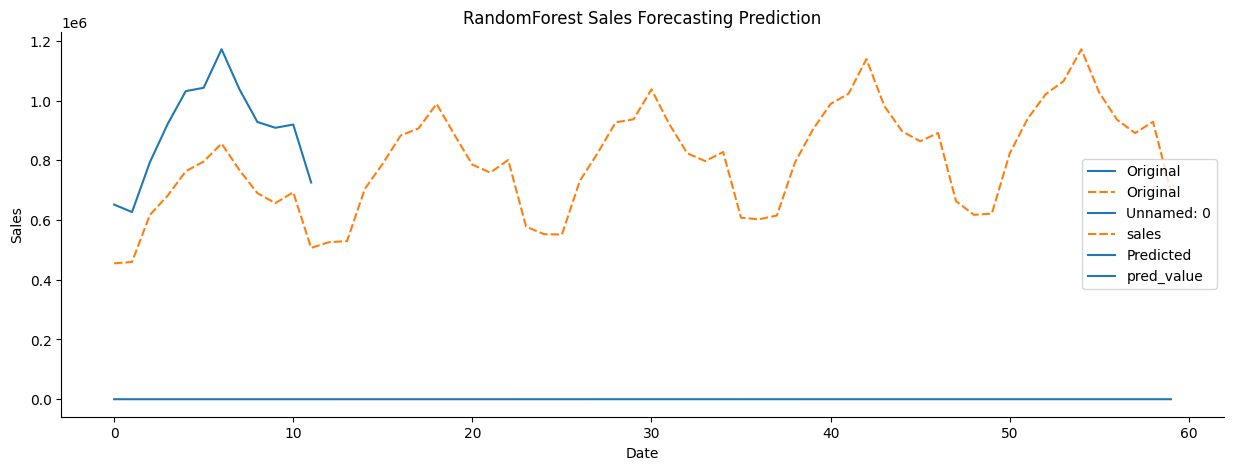

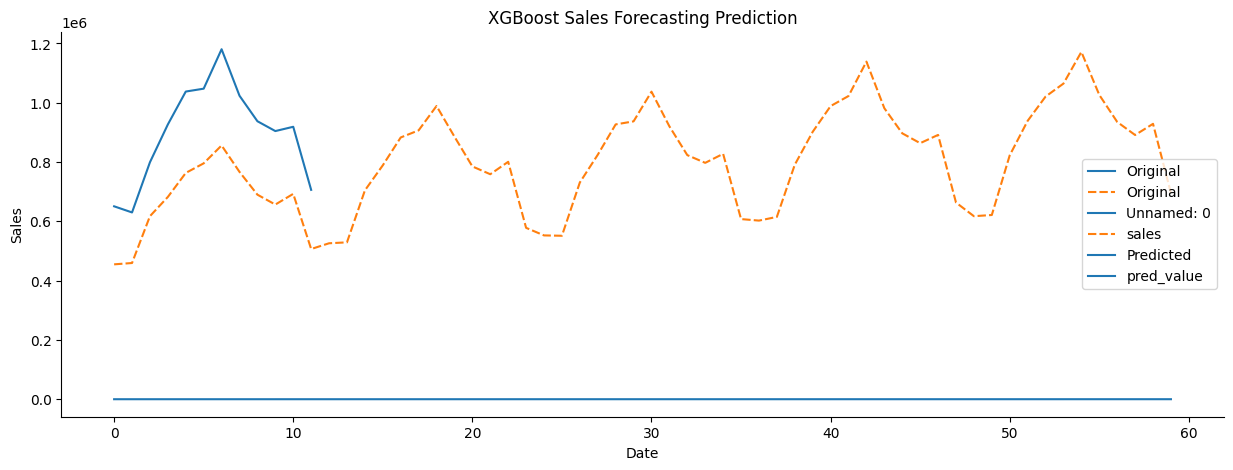

In [19]:
"""
This script predicts the number of monthly product sales using regressive and
time-series modeling techniques. A graph of predicted values against actual
values is plotted for each model and the root mean squared error, mean absolute
error, and R2 scores are pickled for comparison.
Modeling techniques include:
 -- Linear Regression
 -- Random Forest Regression
 -- XGBoost
 -- Long Short Term Memory (artifical recurrent neural network)
 -- ARIMA Time Series Forecasting
"""

import pickle

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

import statsmodels.api as sm

def load_data(file_name):
    """Returns a pandas dataframe from a csv file."""
    return pd.read_csv(file_name)

model_scores = {}

def tts(data):
    """Splits the data into train and test. Test set consists of the last 12
    months of data.
    """
    data = data.drop(['sales', 'date'], axis=1)
    train, test = data[0:-12].values, data[-12:].values

    return train, test

def scale_data(train_set, test_set):
    """Scales data using MinMaxScaler and separates data into X_train, y_train,
    X_test, and y_test.
    Keyword Arguments:
    -- train_set: dataset used to train the model
    -- test_set: dataset used to test the model
    """

    #apply Min Max Scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)

    # reshape training set
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    # reshape test set
    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:, 1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:, 1:], test_set_scaled[:, 0:1].ravel()

    return X_train, y_train, X_test, y_test, scaler

def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    """For visualizing and comparing results, undoes the scaling effect on
    predictions.
    Keyword arguments:
    -- y_pred: model predictions
    -- x_test: features from the test set used for predictions
    -- scaler_obj: the scaler objects used for min-max scaling
    -- lstm: indicate if the model run is the lstm. If True, additional
             transformation occurs
    """

    #reshape y_pred
    y_pred = y_pred.reshape(y_pred.shape[0], 1, 1)

    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

    #rebuild test set for inverse transform
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], x_test[index]],
                                            axis=1))

    #reshape pred_test_set
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0],
                                          pred_test_set.shape[2])

    #inverse transform
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)

    return pred_test_set_inverted

def predict_df(unscaled_predictions, original_df):
    """Generates a dataframe that shows the predicted sales for each month
    for plotting results.
    Keyword arguments:
    -- unscaled_predictions: the model predictions that do not have min-max or
                             other scaling applied
    -- original_df: the original monthly sales dataframe
    """
    #create dataframe that shows the predicted sales
    result_list = []
    sales_dates = list(original_df[-13:].date)
    act_sales = list(original_df[-13:].sales)

    for index in range(0, len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] +
                                        act_sales[index])
        result_dict['date'] = sales_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

def get_scores(unscaled_df, original_df, model_name):
    """Prints the root mean squared error, mean absolute error, and r2 scores
    for each model. Saves all results in a model_scores dictionary for
    comparison.
    Keyword arguments:
    -- unscaled_predictions: the model predictions that do not have min-max or
                             other scaling applied
    -- original_df: the original monthly sales dataframe
    -- model_name: the name that will be used to store model scores
    """
    rmse = np.sqrt(mean_squared_error(original_df.sales[-12:], unscaled_df.pred_value[-12:]))
    mae = mean_absolute_error(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    r2 = r2_score(original_df.sales[-12:], unscaled_df.pred_value[-12:])
    model_scores[model_name] = [rmse, mae, r2]

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R2 Score: {r2}")

def plot_results(results, original_df, model_name):
    """Plots predictions over original data to visualize results. Saves each
    plot as a png.
    Keyword arguments:
    -- results: a dataframe with unscaled predictions
    -- original_df: the original monthly sales dataframe
    -- model_name: the name that will be used in the plot title
    """
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(data=original_df, ax=ax,label='Original', color='mediumblue')
    sns.lineplot(data=results, ax=ax,
                 label='Predicted', color='red')
    ax.set(xlabel="Date",
           ylabel="Sales",
           title=f"{model_name} Sales Forecasting Prediction")
    ax.legend()
    sns.despine()

#     plt.savefig(f'../model_output/{model_name}_forecast.png')

def regressive_model(train_data, test_data, model, model_name):
    """Runs regressive models in SKlearn framework. First calls scale_data
    to split into X and y and scale the data. Then fits and predicts. Finally,
    predictions are unscaled, scores are printed, and results are plotted and
    saved.
    Keyword arguments:
    -- train_set: dataset used to train the model
    -- test_set: dataset used to test the model
    -- model: the sklearn model and model arguments in the form of
              model(kwarga)
    -- model_name: the name that will be used to store model scores and plotting
    """

    # Split into X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data,
                                                                 test_data)
    # Run sklearn models
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)

    # Undo scaling to compare predictions against original data
    original_df = load_data('file1.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)

    # print scores and plot results
    get_scores(unscaled_df, original_df, model_name)
    plot_results(unscaled_df, original_df, model_name)




def main():
    """Calls all functions to load data, run regression models, run lstm model,
    and run arima model.
    """
    # Regression models
    model_df = load_data('file3.csv')
    train, test = tts(model_df)

    # Sklearn
    regressive_model(train, test, LinearRegression(), 'LinearRegression')
    regressive_model(train, test, RandomForestRegressor(n_estimators=100,
                                                        max_depth=20),
                     'RandomForest')
    regressive_model(train, test, XGBRegressor(n_estimators=100,
                                               learning_rate=0.2,
                                               objective='reg:squarederror'),
                     'XGBoost')
    # Keras
  

    # Arima
    ts_data = load_data('file2.csv').set_index('date')
    ts_data.index = pd.to_datetime(ts_data.index)

    

main()

# Save mmodel scores to compare all model results in results.py
pickle.dump(model_scores, open("model_scores.p", "wb"))




RMSE: 16221.040790693221
MAE: 12433.0
R2 Score: 0.9907155879704752
RMSE: 18887.455709191396
MAE: 16004.166666666666
R2 Score: 0.9874123722649184
RMSE: 15701.003359658262
MAE: 13342.666666666666
R2 Score: 0.9913013514225064


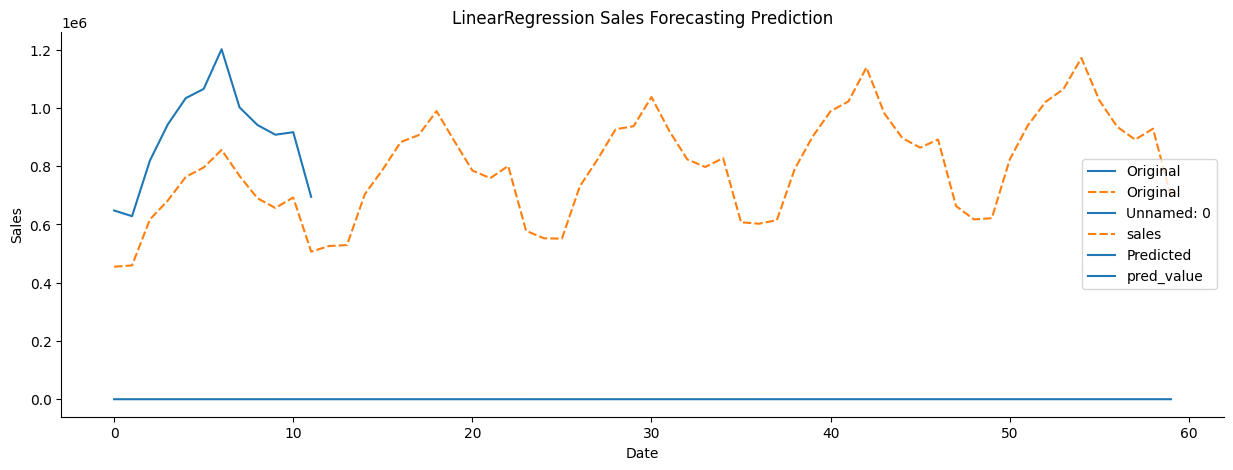

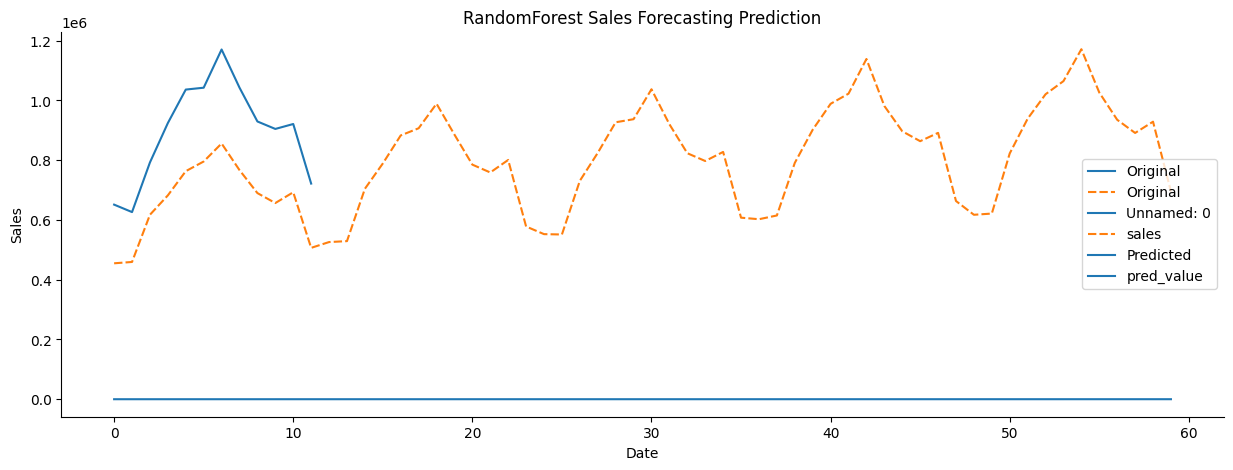

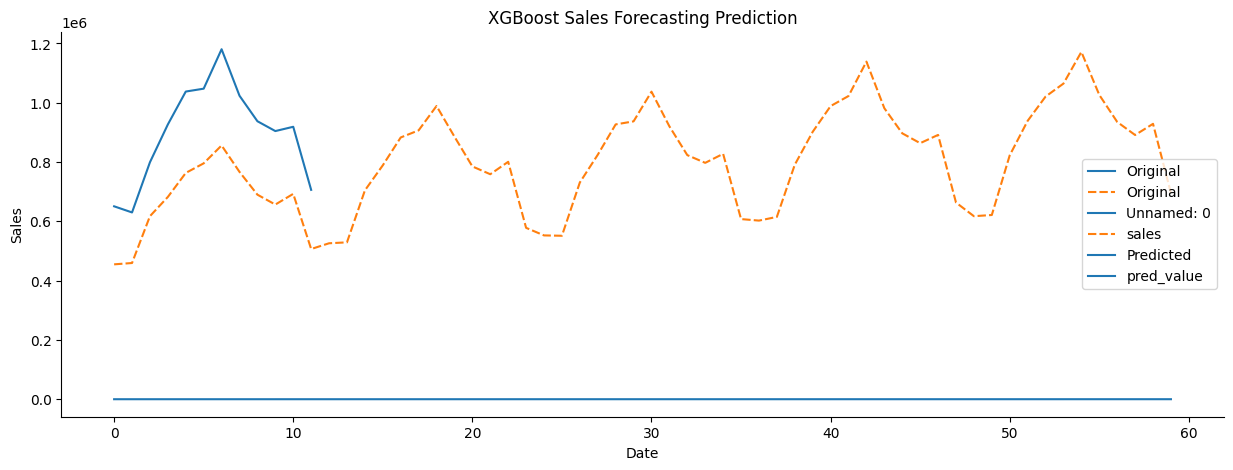

In [20]:
def regressive_model(train_data, test_data, model, model_name):
    
    # Call helper functions to create X & y and scale data
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    # Run regression model
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    # Call helper functions to undo scaling & create prediction df
    original_df = load_data('file1.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    # Call helper functions to print scores and plot results
    get_scores(unscaled_df, original_df, model_name)
    plot_results(unscaled_df, original_df, model_name)

# Separate data into train and test sets
train, test = tts(model_df)
# Call model frame work for linear regression
regressive_model(train, test, LinearRegression(),'LinearRegression')
# Call model frame work for random forest regressor 
regressive_model(train, test, 
                 RandomForestRegressor(n_estimators=100,
                                       max_depth=20),        
                                       'RandomForest')
# Call model frame work for XGBoost
regressive_model(train, test, XGBRegressor(n_estimators=100,
                                           learning_rate=0.2), 
                                           'XGBoost')



In [21]:
import pickle
RF_pkl_filename = 'final_sales_second.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(regressive_model, RF_Model_pkl)
RF_Model_pkl.close()